In [1]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset (Kaggle CSV or Seaborn)
df = pd.read_csv('train.csv')
# or: df = sns.load_dataset('titanic')

In [2]:
#2. Initial Data Inspection
df.head()
df.shape
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [3]:
#3.Summary of missing data
print(df[['Age', 'Cabin', 'Embarked']].isnull().mean())

# Strategy:
df['Age'].fillna(df['Age'].median(), inplace=True)  # robust to skew
df.drop(columns=['Cabin'], inplace=True)           # too many missing values (%)
df.dropna(subset=['Embarked'], inplace=True)       # remove rows missing Embarked

Age         0.198653
Cabin       0.771044
Embarked    0.002245
dtype: float64


C:\Users\artis\AppData\Local\Temp\ipykernel_10376\3617459557.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)  # robust to skew


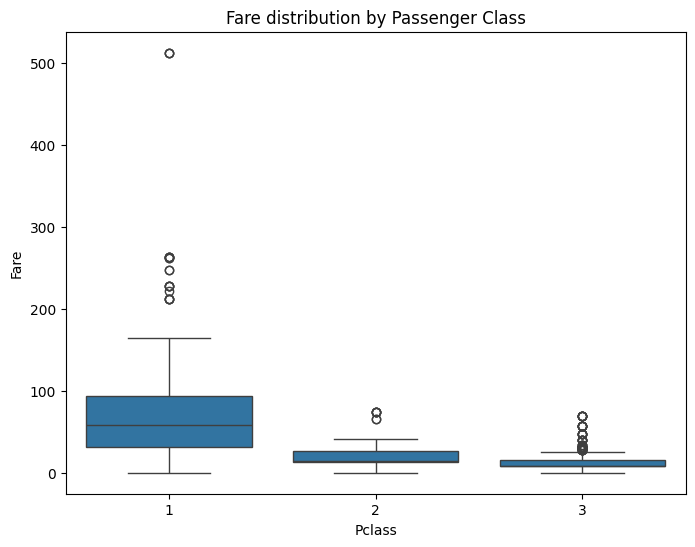

In [4]:
#4. Detecting Outliers
plt.figure(figsize=(8,6))
sns.boxplot(x='Pclass', y='Fare', data=df)
plt.title('Fare distribution by Passenger Class')
plt.show()

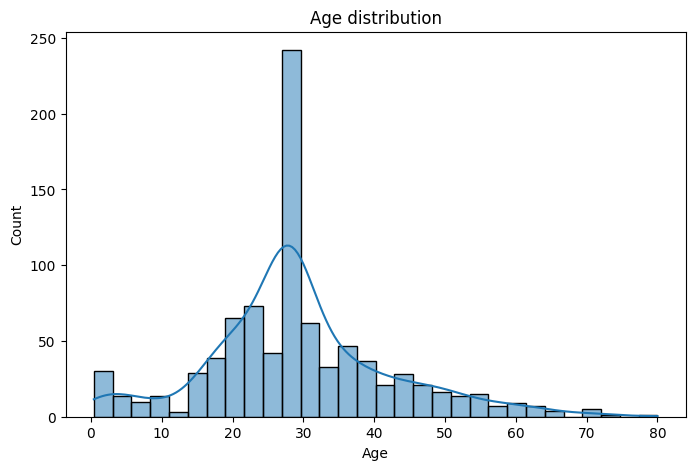

Skewness: 0.5080100783148638


In [5]:
#5.Univariate Distribution
plt.figure(figsize=(8,5))
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Age distribution')
plt.show()
print('Skewness:', df['Age'].skew())

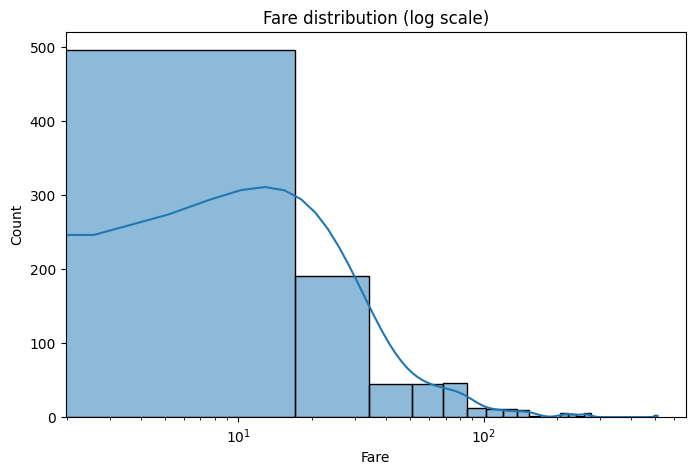

In [6]:
#5.Univariate Distribution
#Fare
plt.figure(figsize=(8,5))
sns.histplot(df['Fare'], bins=30, kde=True)
plt.title('Fare distribution (log scale)')
plt.xscale('log')
plt.show()

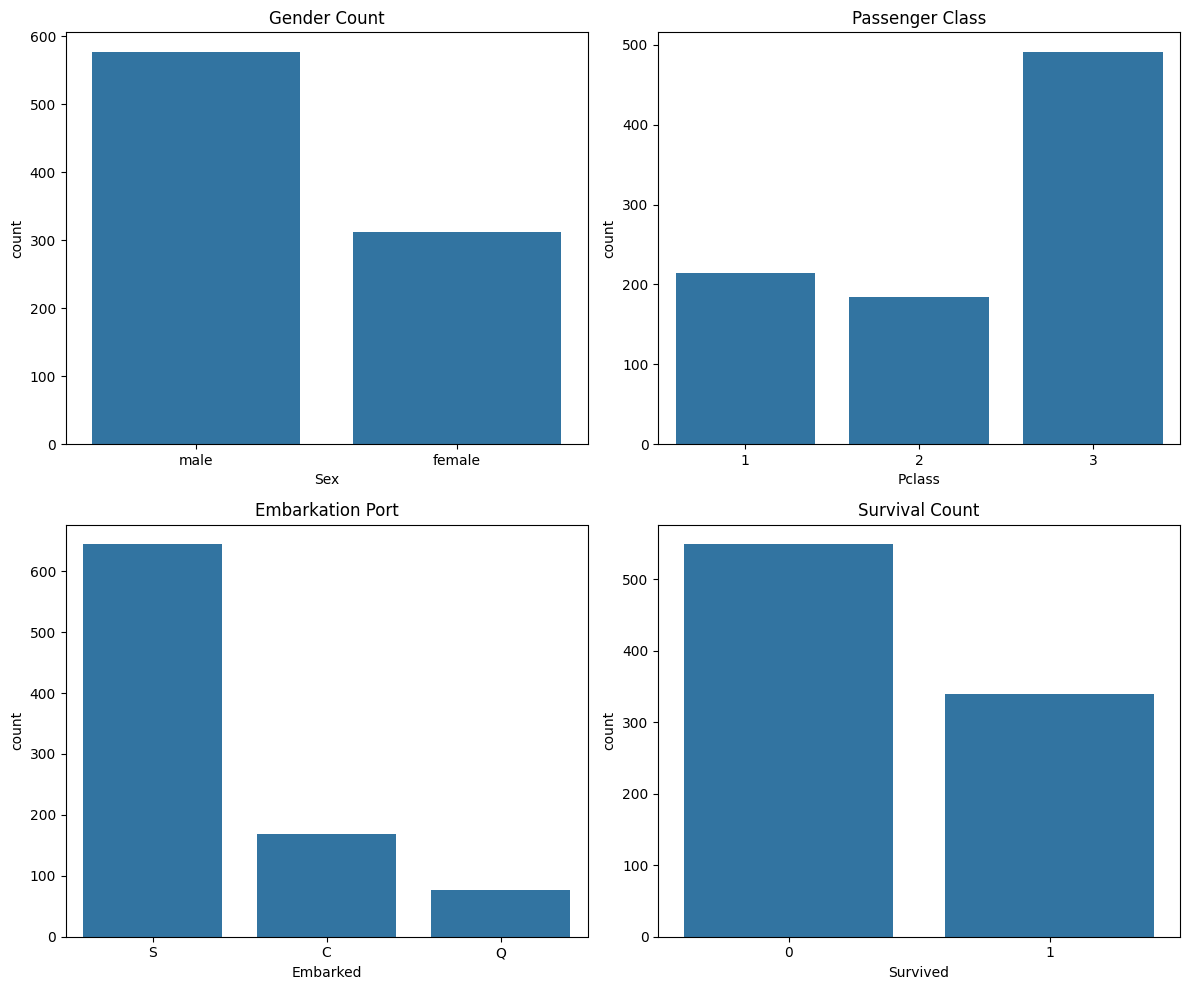

In [7]:
#5.Univariate Distribution
#Categorical Variables (Sex, Embarked, Pclass, Survived)
fig, axes = plt.subplots(2, 2, figsize=(12,10))
sns.countplot(x='Sex', data=df, ax=axes[0,0]).set_title('Gender Count')
sns.countplot(x='Pclass', data=df, ax=axes[0,1]).set_title('Passenger Class')
sns.countplot(x='Embarked', data=df, ax=axes[1,0]).set_title('Embarkation Port')
sns.countplot(x='Survived', data=df, ax=axes[1,1]).set_title('Survival Count')
plt.tight_layout()
plt.show()

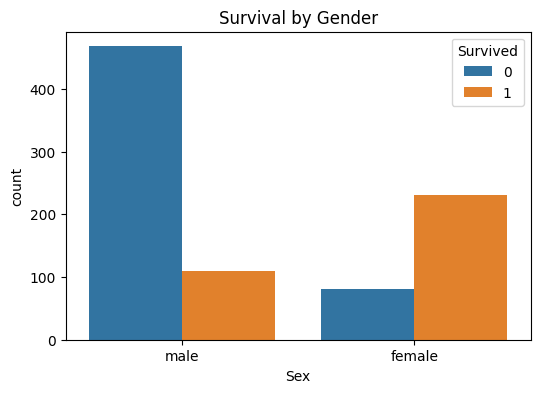

In [8]:
#6.Bivariate Analysis: Relationships
#Survival by gender
plt.figure(figsize=(6,4))
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title('Survival by Gender')
plt.show()

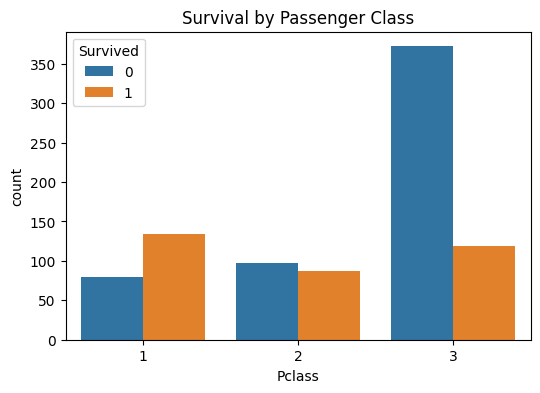

In [9]:
#6.Bivariate Analysis: Relationships
#Survival by Passenger Class
plt.figure(figsize=(6,4))
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title('Survival by Passenger Class')
plt.show()

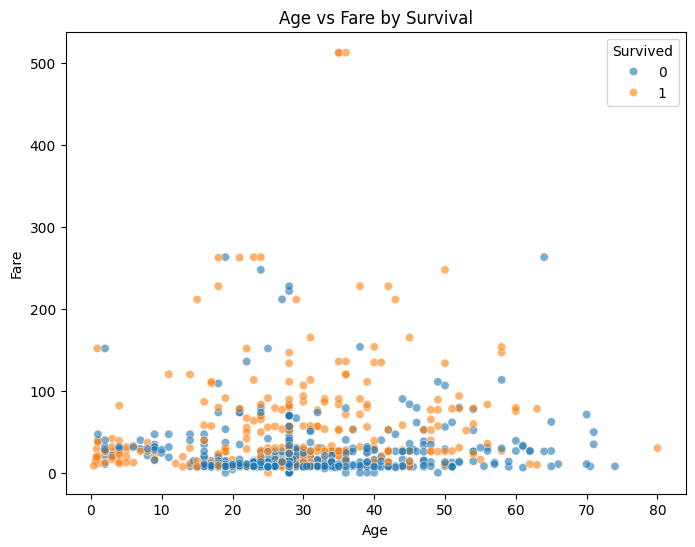

In [10]:
#6.Bivariate Analysis: Relationships
#Age vs. Fare Scatter
plt.figure(figsize=(8,6))
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=df, alpha=0.6)
plt.title('Age vs Fare by Survival')
plt.show()

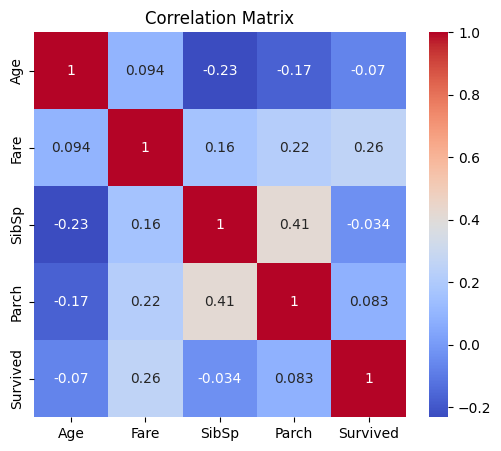

In [11]:
#7.Correlation and Heatmap
corr = df[['Age', 'Fare', 'SibSp', 'Parch', 'Survived']].corr()
plt.figure(figsize=(6,5))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

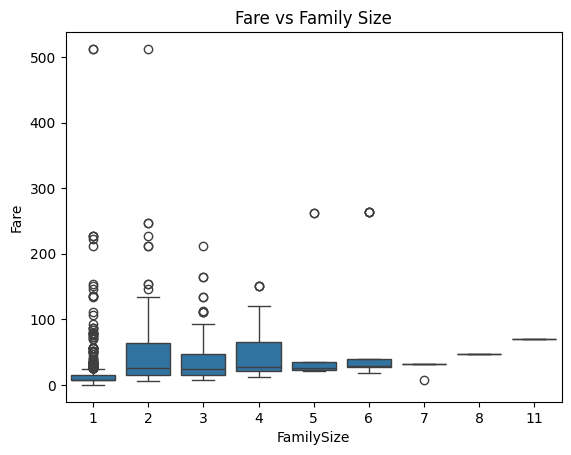

In [12]:
#Feature Engineering
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
sns.boxplot(x='FamilySize', y='Fare', data=df)
plt.title('Fare vs Family Size')
plt.show()